In [1]:
%env ROS_IP=192.168.0.17
%env ROS_MASTER_URI=http://192.168.0.17:11311

!export ROS_MASTER_URI=http://192.168.0.17:11311
!export ROS_IP=192.168.0.17

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=192.168.0.17
env: ROS_MASTER_URI=http://192.168.0.17:11311


192.168.0.17
http://192.168.0.17:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


In [3]:
cam = LocobotCamera()


In [4]:
arm_control = LocobotArmControl(use_simulation=False)


[INFO] [1745961996.924498]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745961997.100749]: Joint‐space action server ready


[ WARN] [1745961997.184326075]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186703770]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186751497]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186767634]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186787226]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186801592]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186821695]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186836098]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745961997.186852184]: Link 'locobot/ca

[ INFO] [1745961997.192684017]: Loading robot model 'locobot'...
[ INFO] [1745961997.192730054]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1745962000.365682133]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745962000.885001]: LocobotArmControl initialized


In [5]:
arm_control.open_gripper()

In [6]:
arm_control.close_gripper()

[WARN] [1745962004.344351]: ❌ No object detected before fully closed


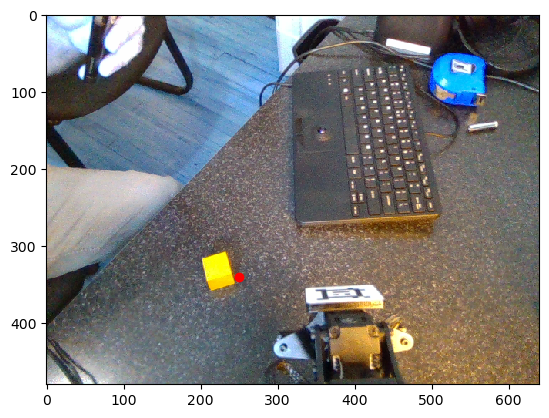

In [7]:
# Example: Grab cube at center of image
# cam.pan(0.0)
# cam.tilt(1.1)
height, width = cam.get_image().shape[:2]
center_x = 250
center_y = 340

plt.imshow(cam.get_image())
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

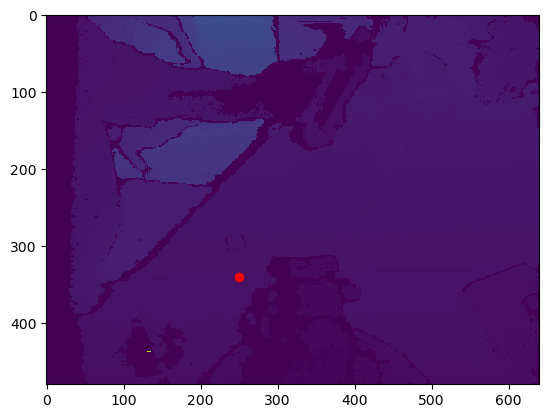

In [8]:
plt.imshow(cam.depth)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [9]:
point_camera = cam.depth[center_x, center_y]
print(point_camera)

0.601


In [10]:
point_cam = cam.depth_to_xyz(center_x, center_y)
print(point_cam)

[-0.10878596  0.143924    0.545     ]


In [11]:
from visioncraft.utils.transform_utils import transform_point_to_base_frame

In [12]:
point_base = transform_point_to_base_frame(point_cam, target_frame="locobot/base_footprint",  source_frame="locobot/camera_depth_optical_frame")
print(point_base)

[0.26823807639456826, 0.12277341026929414, 0.010638087968267262]


In [13]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base, size=0.03)

Point in base frame: [0.26823807639456826, 0.12277341026929414, 0.010638087968267262]


object detected


In [14]:
point_base_2 = point_base + np.array([0.1, 0.1, 0.03])
arm_control.place(point_base_2, size=0.03)
arm_control.open_gripper()